In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

In [2]:
def idft2(yr, yi):
    N, x = yr.shape[0], []
    yr = dict(yr.values)
    yi = dict(yi.values)
    for t in range(N):
        real = 0
        for (k,v),(k2,v2) in zip(yr.items(),yi.items()):
            theta1 = t * (2 * math.pi) * k
            theta2 = t * (2 * math.pi) * k2
            real += (v * math.cos(theta1)) - (v2 * math.sin(theta2))
        x.append(real/N)
    return x

In [3]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [4]:
#Func gives real and imag of FFT provide dataframe in Time Domain
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

In [5]:
def log_freq(df1, df2):
    df1['Ampli'] = np.log(df1["Ampli"])
    df1['Ampli'] = df1['Ampli'].replace([np.inf, -np.inf], 0)
    df1 = df1.fillna(0)
    df2['Ampli'] = np.log(df2["Ampli"])
    df2['Ampli'] = df2['Ampli'].replace([np.inf, -np.inf], 0)
    df2 = df2.fillna(0)
    return df1, df2

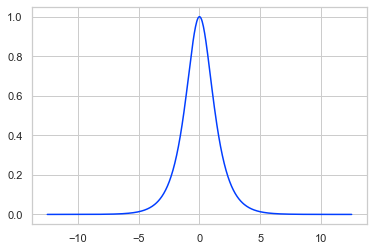

In [10]:
from scipy import signal
import math
t = np.linspace(-12.5, 12.5, 500)
s = np.zeros(500)
s = 1/np.cosh(x)
plt.plot(t, s)
plt.show()

In [11]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_1

,Time,Value
0,-12.500000,0.000007
1,-12.449900,0.000008
2,-12.399800,0.000008
3,-12.349699,0.000009
4,-12.299599,0.000009
...,...,...
495,12.299599,0.000009
496,12.349699,0.000009
497,12.399800,0.000008
498,12.449900,0.000008


## Magnitude of Freq

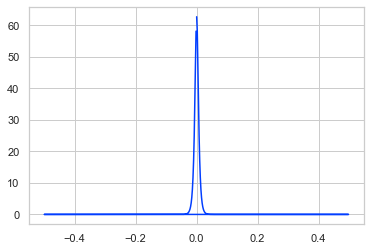

In [12]:
freq_ampli_mag = freq_mag(signal_1)
plt.plot(freq_ampli_mag['Freq'], freq_ampli_mag['Ampli'])

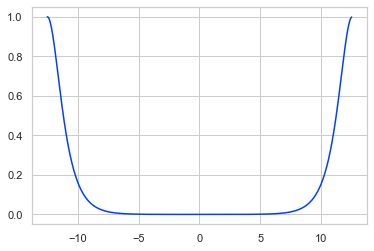

In [13]:
value = list(freq_ampli_mag['Ampli'])
ift = fft.ifft(value)
plt.plot(t,ift)

## Freq on Real and Imag

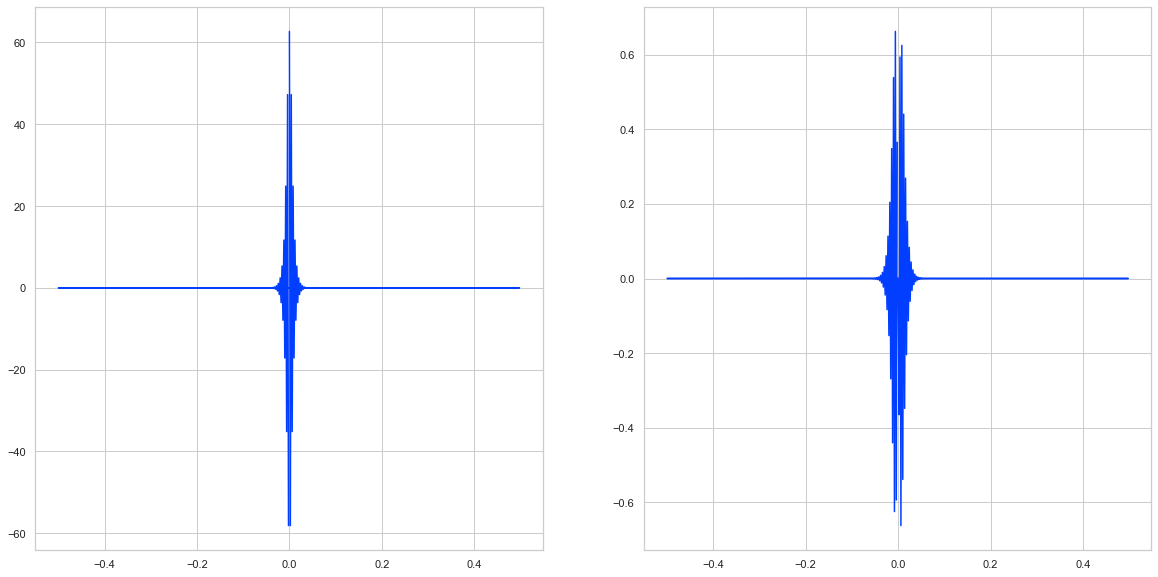

In [14]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[1].plot(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])

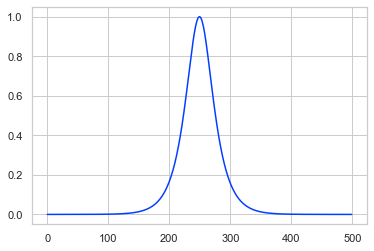

In [15]:
value = idft2(freq_ampli1,freq_ampli1i)
plt.plot(value)

In [16]:
distance.euclidean(signal_1["Value"],value)

5.970649251282115e-15

Recreating the pattern

## Log Freq

In [59]:
log1, log1i = log_freq(freq_ampli1, freq_ampli1i)

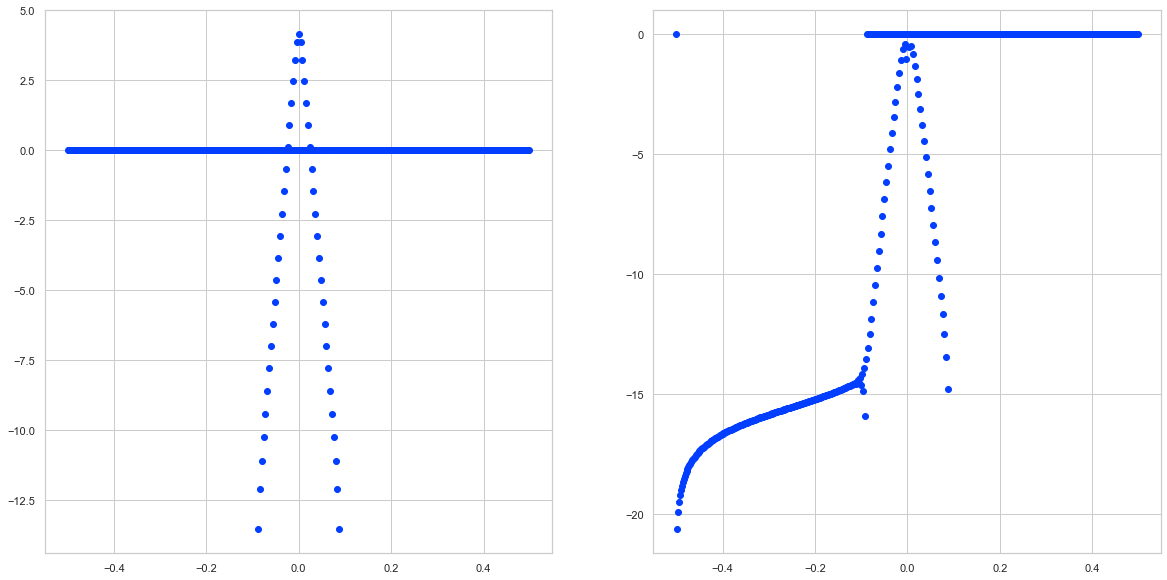

In [60]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].scatter(log1['Freq'], log1['Ampli'])
axs[1].scatter(log1i['Freq'], log1i['Ampli'])

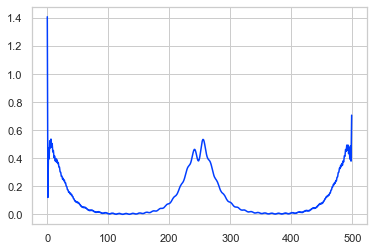

In [19]:
log1["Ampli"] = np.exp(log1["Ampli"])
log1i["Ampli"] = np.exp(log1i["Ampli"])
value = idft2(log1,log1i)
plt.plot(value)

In [20]:
distance.euclidean(signal_1["Value"],value)

4.703444213554055

## Cepstrum

In [21]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps, _ = complex_cepstrum(signal_1['Value'])
print(ceps)

[-1.36084647e+01  4.58701939e+01  1.90827369e+01  1.04117525e+01
  4.56524768e+00  1.95720660e+00 -2.22483740e-01 -6.96148145e-01
 -1.19963732e+00 -7.09827396e-01 -5.77222350e-01  7.10799840e-02
  1.67210158e-01  5.44185514e-01  3.65273214e-01  4.47662049e-01
  1.03443536e-01  9.72853362e-02 -1.98376319e-01 -1.09573836e-01
 -2.54034082e-01 -4.76510770e-02 -9.74372079e-02  1.27158444e-01
  5.67410374e-02  2.06836168e-01  6.18415956e-02  1.35041218e-01
 -4.61066207e-02  1.65232202e-02 -1.31564373e-01 -2.42264092e-02
 -1.13927863e-01  3.22472503e-02 -3.28029485e-02  1.05069378e-01
  1.72785897e-02  1.14166343e-01 -7.93646207e-03  5.99486193e-02
 -6.78258082e-02  7.62087929e-03 -9.35965092e-02  9.30070672e-03
 -6.33550183e-02  5.28377394e-02 -1.68649286e-02  8.46376136e-02
 -4.76066455e-03  7.15684745e-02 -3.42424844e-02  3.25302851e-02
 -6.77169402e-02  1.13845953e-02 -6.84101687e-02  2.73879703e-02
 -3.91195624e-02  5.79064592e-02 -1.43301765e-02  6.75709913e-02
 -1.96860410e-02  4.75271

-44.0


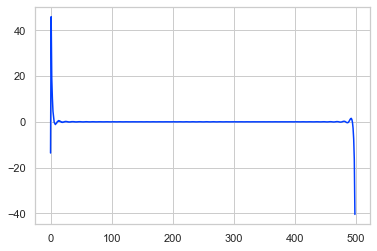

In [22]:
print(_)
plt.plot(t, ceps)

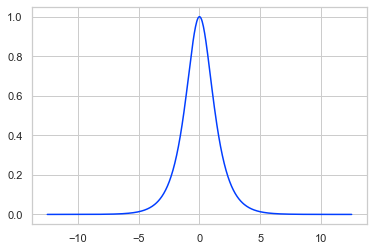

In [27]:
incep = inverse_complex_cepstrum(ceps, np.array(-44.0))    # inverse ceps
plt.plot(signal_1['Time'], incep)

In [28]:
distance.euclidean(signal_1["Value"],incep)

4.292293032634863e-13

# GMM of All

## GMM on Time Series

In [25]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 100)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [29]:
ts = GMM_fit(signal_1)
print(ts, '\n')
print('WEIGHTS -', ts.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', ts.means_, '\n')

GaussianMixture(n_components=17) 

WEIGHTS - [0.03622064 0.03437302 0.10450951 0.14913771 0.02428221 0.06075148
 0.03383143 0.04517665 0.05181511 0.06761008 0.03205819 0.12819521
 0.053327   0.04236216 0.06600482 0.03370318 0.03664162] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 3.85744069e+00  4.37116342e-02]
 [-3.68281081e+00  5.18591692e-02]
 [-1.11655595e+01  4.06147547e-05]
 [ 8.99016337e+00  4.51051472e-04]
 [-2.35903881e-03  9.84913443e-01]
 [-5.94838030e+00  5.80044889e-03]
 [ 2.97950125e+00  1.04397836e-01]
 [ 4.87939214e+00  1.60660416e-02]
 [-9.55483998e-01  6.72039368e-01]
 [ 1.15951157e+01  2.20496881e-05]
 [-2.85033205e+00  1.18328450e-01]
 [-8.33516446e+00  7.53481765e-04]
 [ 9.69960689e-01  6.65703952e-01]
 [-4.64558770e+00  2.01551307e-02]
 [ 6.29071239e+00  4.21643492e-03]
 [-2.02661016e+00  2.65745445e-01]
 [ 2.09663782e+00  2.49623642e-01]] 



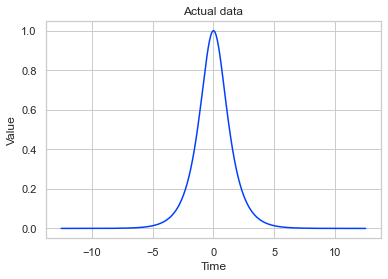

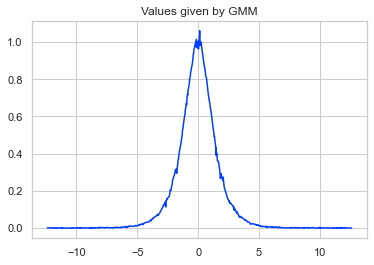

In [30]:
z,_ = ts.sample(500)
plt.title('Actual data')
sns.lineplot(signal_1['Time'], signal_1['Value'])
plt.show()
plt.title('Values given by GMM')
sns.lineplot(z[:,0],z[:,1])
plt.show()

In [31]:
distance.euclidean(signal_1["Value"], z[:, 1])

6.692247014313323

## GMM on Real and Img Freq

In [32]:
freq_ampli1,freq_ampli1i = freq(signal_1)

In [33]:
fr = GMM_fit(freq_ampli1)                        # GMM on real part of FFT data
fi = GMM_fit(freq_ampli1i)                      # GMM on imaginary part of FFT data

In [34]:
print(fr, '\n')
print('WEIGHTS -', fr.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',fr.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=17) 

WEIGHTS - [0.44632447 0.004      0.004      0.004      0.004      0.004
 0.002      0.004      0.004      0.02952402 0.004      0.01700163
 0.00399999 0.004      0.01719886 0.44395551 0.00399552] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-2.75725256e-01  4.59349724e-07]
 [ 0.00000000e+00  4.72549682e+01]
 [ 0.00000000e+00 -5.81344201e+01]
 [ 0.00000000e+00  2.48641791e+01]
 [ 0.00000000e+00 -3.51480120e+01]
 [ 0.00000000e+00 -1.71480552e+01]
 [ 0.00000000e+00  6.27058992e+01]
 [ 0.00000000e+00  1.16827744e+01]
 [ 0.00000000e+00 -7.91430893e+00]
 [ 3.41737277e-04 -2.79779006e-01]
 [ 0.00000000e+00  5.34706812e+00]
 [ 4.63584166e-02 -2.03342838e-03]
 [-2.83270018e-10  2.43340504e+00]
 [-2.29488654e-12 -3.60830392e+00]
 [-4.61926286e-02 -2.68129668e-03]
 [ 2.74935501e-01  5.51689234e-07]
 [-3.04919175e-07  1.10596991e+00]] 



In [35]:
print(fi, '\n')
print('WEIGHTS -', fi.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',fi.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=3) 

WEIGHTS - [0.45932569 0.08415162 0.45652269] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-2.67814864e-01 -2.27328966e-06]
 [ 1.49730240e-06 -3.63446842e-08]
 [ 2.67268469e-01  2.29394688e-06]] 



In [36]:
z1,_ = fr.sample(500)
z1i,_ = fi.sample(500)

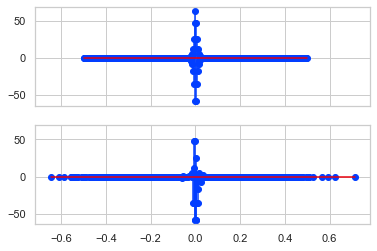

In [37]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#plt.show()
ax[1].stem(z1[:, 0], z1[:, 1])
plt.show()

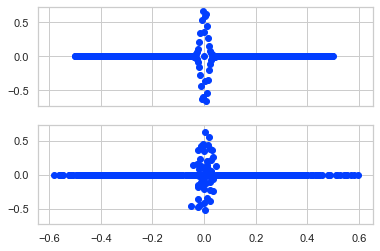

In [38]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#plt.show()
ax[1].scatter(z1i[:, 0], z1i[:, 1])
plt.show()

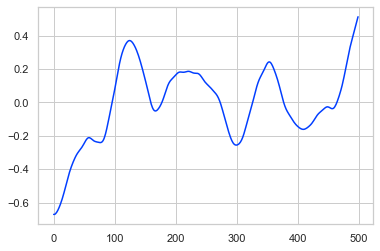

In [39]:
fr_d = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])
fi_d = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])
value = idft2(fr_d,fi_d)
plt.plot(value)

In [40]:
distance.euclidean(signal_1["Value"], value)

7.532364569530386

## GMM on Log-Freq

In [41]:
lr = GMM_fit(log1)                        # GMM on real part of FFT data
li = GMM_fit(log1i)

In [42]:
print(lr, '\n')
print('WEIGHTS -', lr.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',lr.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=9) 

WEIGHTS - [0.47321501 0.004      0.004      0.002      0.004      0.02510034
 0.004      0.04692864 0.43675601] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 2.54402883e-01  1.00000000e+00]
 [ 0.00000000e+00  4.72549682e+01]
 [ 0.00000000e+00  2.48641791e+01]
 [ 0.00000000e+00  6.27058992e+01]
 [ 0.00000000e+00  1.16827744e+01]
 [-2.38086393e-06  7.06519872e-01]
 [ 7.35522755e-16  5.34706812e+00]
 [ 9.33522092e-08  2.86260119e-03]
 [-2.77929109e-01  1.00000000e+00]] 



In [43]:
print(li, '\n')
print('WEIGHTS -', li.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',li.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=3) 

WEIGHTS - [0.04189555 0.45610507 0.50199938] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-3.21488152e-04  2.19838858e-01]
 [-2.64058751e-01  4.59203209e-05]
 [ 2.37952491e-01  1.00000000e+00]] 



In [44]:
z2,_ = lr.sample(500)
z2i,_ = li.sample(500)

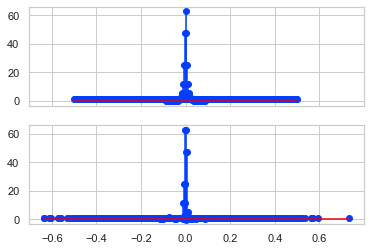

In [45]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].stem(log1['Freq'], log1['Ampli'])
#plt.show()
ax[1].stem(z2[:, 0], z2[:, 1])
plt.show()

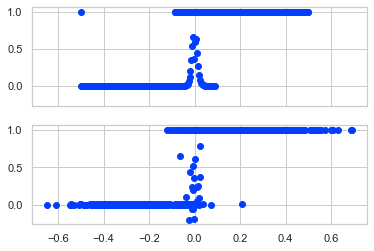

In [46]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(log1i['Freq'], log1i['Ampli'])
#plt.show()
ax[1].scatter(z2i[:, 0], z2i[:, 1])
plt.show()

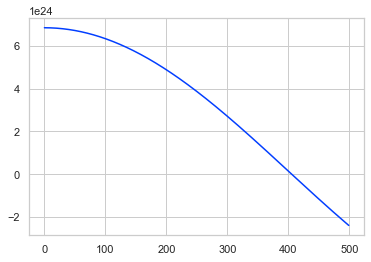

In [47]:
lr_d = pd.DataFrame(zip(z2[:,0],np.exp(z2[:,1])),columns=['Freq','Ampli'])
li_d = pd.DataFrame(zip(z2i[:,0],np.exp(z2i[:,1])),columns=['Freq','Ampli'])
value = idft2(lr_d,li_d)
plt.plot(value)

In [48]:
distance.euclidean(signal_1["Value"],value)

9.830639202583629e+25

## GMM on Cepstrum

In [49]:
c1 = np.array(ceps).reshape(-1, 1)
c = GMM_fit(c1)

In [50]:
print(c, '\n')
print('WEIGHTS -', c.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', c.means_, '\n')

GaussianMixture(covariance_type='spherical', n_components=15) 

WEIGHTS - [0.38804399 0.002      0.002      0.002      0.002      0.002
 0.002      0.002      0.01282755 0.002      0.002      0.01344218
 0.06372511 0.38935556 0.11460561] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 2.71097931e-02]
 [ 4.58701939e+01]
 [-4.04103983e+01]
 [-1.64211091e+01]
 [ 1.90827369e+01]
 [ 1.04117525e+01]
 [-7.46805923e+00]
 [ 4.56524768e+00]
 [ 1.16680338e+00]
 [-2.85085588e+00]
 [-1.36084647e+01]
 [-5.23094335e-01]
 [ 1.52978358e-02]
 [-2.75357737e-02]
 [ 1.06948264e-02]] 



In [51]:
z3,_ = c.sample(500)

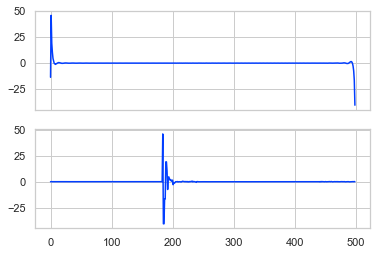

In [52]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].plot(t, ceps)
#plt.show()
ax[1].plot(t, z3.flatten())
plt.show()

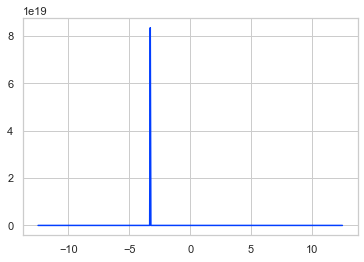

In [55]:
gmm_incep = inverse_complex_cepstrum(z3, np.array(-44.0))    # inverse ceps
plt.plot(signal_1['Time'], gmm_incep)

In [56]:
distance.euclidean(signal_1['Value'], gmm_incep)

8.344343907655821e+19